In [64]:
import os
import sys
import shutil
import csv

if 'SUMO_HOME' in os.environ:
    sys.path.append(os.path.join(os.environ['SUMO_HOME'], 'tools'))
import matplotlib.pyplot as plt
import pandas as pd
import traci

sys.path.append(os.path.abspath("../src"))
from sim import sumo_helper
from sim import sumo_simulation

FOLDER_NAME = "../src/sumo_map/town05" # Path to SUMO map folder

In [65]:
importlib.reload(sumo_simulation) # Reload the sumo_helper module to use the new functions

<module 'sim.sumo_simulation' from '/home/renan/Documents/simulated_driving_behavior/src/sim/sumo_simulation.py'>

In [66]:
delta_time = 0.01 # This delta time has to be the same as the one used in CARLA
end_time = 0 # 0 means no end time, the simulation will run until all vehicles finish their route

## Fixed Parameters

In [69]:
# ignore the first line (header) and read the rest as dictionaries
with open(f"{FOLDER_NAME}/id_to_vtype_fixed.csv", newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    id_styles = {row['id']: row['style'] for row in reader}
    
id_styles
routine_ids = list(id_styles.keys())
veh_style_per_student = list(id_styles.values())
routine_ids

['veh_0_normal', 'veh_0_aggressive']

### Fixed Parameters (no traffic)

In [70]:
output_data_path = "../data/synthetic/sumo/fixed/no_traffic"
experiment2_file = 'finaltrips_fixed.rou.xml' # The file that contains the routes for the experiment

if os.path.exists(output_data_path):
    shutil.rmtree(output_data_path)
os.makedirs(output_data_path, exist_ok=True)

sumo_helper.add_xml_child(f'{FOLDER_NAME}/osm.sumocfg', 'input', 'route-files', f'{experiment2_file}', replace=True)

Child <route-files> already exists. Updating value to 'finaltrips_fixed.rou.xml'.
XML file updated and formatted successfully.


True

In [73]:
veh_variables = sumo_simulation.get_all_variables(FOLDER_NAME, routine_ids, delta_time=delta_time, end_hours=end_time, use_gui=False, convert_geo=False, freeze_traffic_lights=True) # Running the simulation
sumo_simulation.save_data(veh_variables, output_data_path, delta_time, new_dir=True, verify=True, use_lat_lon=False)

 Retrying in 1 seconds
Child <step-length> with value '0.01' already exists. Skipping addition.
Child <end> with value '' already exists. Skipping addition.
Vehicle veh_0_normal has departed
Vehicle veh_0_aggressive has departed
Step #797.83 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 2 ACT 0 BUF 0)                     tep #45.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 2 ACT 2 BUF 0)                      ep #90.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 2 ACT 2 BUF 0)                      p #135.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 2 ACT 2 BUF 0)                      #180.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 2 ACT 2 BUF 0)                     #225.00 (1ms ~= 10.00*RT, ~2000.00UPS, TraCI: 0ms, vehicles TOT 2 ACT 2 BUF 0)       270.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 2 ACT 2 BUF 0)                     15.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 2 ACT 2 BUF 0)                     0.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 2 ACT 2 BUF 0)                  

### Fixed Parameters (traffic)

In [74]:
output_data_path = "../data/synthetic/sumo/fixed/traffic"
experiment2_file = 'merged_fixed.rou.xml' # The file that contains the routes for the experiment

if os.path.exists(output_data_path):
    shutil.rmtree(output_data_path)
os.makedirs(output_data_path, exist_ok=True)

sumo_helper.add_xml_child(f'{FOLDER_NAME}/osm.sumocfg', 'input', 'route-files', f'{experiment2_file}', replace=True)

Child <route-files> already exists. Updating value to 'merged_fixed.rou.xml'.
XML file updated and formatted successfully.


True

In [75]:
try:
    veh_variables = sumo_simulation.get_all_variables(FOLDER_NAME, routine_ids, delta_time=delta_time, end_hours=end_time, use_gui=False, convert_geo=False, freeze_traffic_lights=True) # Running the simulation
    sumo_simulation.save_data(veh_variables, output_data_path, delta_time, new_dir=True, verify=True, use_lat_lon=False)
except traci.TraCIException as e:
    traci.close()
    print(f"An error occurred: {e}")

 Retrying in 1 seconds
Child <step-length> with value '0.01' already exists. Skipping addition.
Child <end> with value '' already exists. Skipping addition.
Vehicle veh_0_normal has departed
Vehicle veh_0_aggressive has departed


Step #356.00 (1ms ~= 10.00*RT, ~9000.00UPS, TraCI: 0ms, vehicles TOT 38 ACT 9 BUF 0)      tep #177.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 20 ACT 6 BUF 0)                    ep #222.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 25 ACT 7 BUF 0)                    p #267.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 29 ACT 7 BUF 0)                     #312.00 (1ms ~= 10.00*RT, ~10000.00UPS, TraCI: 1ms, vehicles TOT 34 ACT 10 BUF 0)    

Step #2075.51 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 202 ACT 0 BUF 0)                  tep #1493.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 152 ACT 6 BUF 0)                  ep #1538.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 156 ACT 6 BUF 0)                  p #1583.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 161 ACT 5 BUF 0)                   #1628.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 165 ACT 8 BUF 0)                  #1673.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 170 ACT 3 BUF 0)                  1718.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 174 ACT 4 BUF 0)                  763.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 179 ACT 5 BUF 0)                  08.00 (1ms ~= 10.00*RT, ~5000.00UPS, TraCI: 1ms, vehicles TOT 183 ACT 5 BUF 0)    3.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 188 ACT 6 BUF 0)                  .00 (1ms ~= 10.00*RT, ~2000.00UPS, TraCI: 0ms, vehicles TOT 192 ACT 2 BUF 0)    00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 197 ACT 5 BUF 0)    

## LLM Parameters

In [77]:
# ignore the first line (header) and read the rest as dictionaries
with open(f"{FOLDER_NAME}/id_to_vtype_llm.csv", newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    id_styles = {row['id']: row['style'] for row in reader}
    
id_styles
routine_ids = list(id_styles.keys())
veh_style_per_student = list(id_styles.values())
routine_ids

['veh_0_aggressive']

### LLM Parameters (no traffic)

In [78]:
output_data_path = "../data/synthetic/sumo/llm/no_traffic"
experiment2_file = 'finaltrips_llm.rou.xml' # The file that contains the routes for the experiment

if os.path.exists(output_data_path):
    shutil.rmtree(output_data_path)
os.makedirs(output_data_path, exist_ok=True)

sumo_helper.add_xml_child(f'{FOLDER_NAME}/osm.sumocfg', 'input', 'route-files', f'{experiment2_file}', replace=True)

Child <route-files> already exists. Updating value to 'finaltrips_llm.rou.xml'.
XML file updated and formatted successfully.


True

In [79]:
try:
    veh_variables = sumo_simulation.get_all_variables(FOLDER_NAME, routine_ids, delta_time=delta_time, end_hours=end_time, use_gui=False, convert_geo=False, freeze_traffic_lights=True) # Running the simulation
    sumo_simulation.save_data(veh_variables, output_data_path, delta_time, new_dir=True, verify=True, use_lat_lon=False)
except traci.TraCIException as e:
    traci.close()
    print(f"An error occurred: {e}")

 Retrying in 1 seconds
Child <step-length> with value '0.01' already exists. Skipping addition.
Child <end> with value '' already exists. Skipping addition.
Vehicle veh_0_aggressive has departed
Step #968.09 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 1 ACT 0 BUF 0)                     tep #45.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 1 ACT 1 BUF 0)                      ep #90.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 1 ACT 1 BUF 0)                      p #135.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 1 ACT 1 BUF 0)                      #180.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 1 ACT 1 BUF 0)                     #225.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 1 ACT 1 BUF 0)                     270.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 1 ACT 1 BUF 0)                     15.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 1 ACT 1 BUF 0)                     0.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 1 ACT 1 BUF 0)                     .00 (0ms ?*RT. ?UPS, TraCI: 1ms

### LLM Parameters (traffic)

In [80]:
output_data_path = "../data/synthetic/sumo/llm/traffic"
experiment2_file = 'merged_llm.rou.xml' # The file that contains the routes for the experiment

if os.path.exists(output_data_path):
    shutil.rmtree(output_data_path)
os.makedirs(output_data_path, exist_ok=True)

sumo_helper.add_xml_child(f'{FOLDER_NAME}/osm.sumocfg', 'input', 'route-files', f'{experiment2_file}', replace=True)

Child <route-files> already exists. Updating value to 'merged_llm.rou.xml'.
XML file updated and formatted successfully.


True

In [81]:
try:
    veh_variables = sumo_simulation.get_all_variables(FOLDER_NAME, routine_ids, delta_time=delta_time, end_hours=end_time, use_gui=False, convert_geo=False, freeze_traffic_lights=True) # Running the simulation
    sumo_simulation.save_data(veh_variables, output_data_path, delta_time, new_dir=True, verify=True, use_lat_lon=False)
except traci.TraCIException as e:
    traci.close()
    print(f"An error occurred: {e}")

 Retrying in 1 seconds
Child <step-length> with value '0.01' already exists. Skipping addition.
Child <end> with value '' already exists. Skipping addition.
Vehicle veh_0_aggressive has departed


Step #2059.85 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 201 ACT 0 BUF 0)                  tep #1390.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 141 ACT 5 BUF 0)                  ep #1435.00 (1ms ~= 10.00*RT, ~6000.00UPS, TraCI: 1ms, vehicles TOT 145 ACT 6 BUF 0)    p #1480.00 (1ms ~= 10.00*RT, ~7000.00UPS, TraCI: 0ms, vehicles TOT 150 ACT 7 BUF 0)     #1525.00 (1ms ~= 10.00*RT, ~5000.00UPS, TraCI: 1ms, vehicles TOT 154 ACT 5 BUF 0)    #1570.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 159 ACT 5 BUF 0)                  1615.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 163 ACT 8 BUF 0)                  660.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 168 ACT 5 BUF 0)                  05.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 172 ACT 4 BUF 0)                  0.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 177 ACT 6 BUF 0)                  .00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 181 ACT 7 BUF 0)                  00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 186 ACT 5 BUF 0)    

## Plots and Visualization

In [85]:
def plot_df(df, title):
    fig, axs = plt.subplots(1, 3, figsize=(25, 5))

    time_str = 'Time(s)'
    # Plot acc_x
    axs[0].plot(df['timestamp'], df['acc_x'], label='acc_x')
    axs[0].set_title('Acceleration X over Time')
    axs[0].set_xlabel(time_str)
    axs[0].set_ylabel('acc_x (m/s²)')
    axs[0].legend()
    axs[0].grid(True)

    # Plot acc_y
    axs[1].plot(df['timestamp'], df['acc_y'], label='acc_y', color='orange')
    axs[1].set_title('Acceleration Y over Time')
    axs[1].set_xlabel(time_str)
    axs[1].set_ylabel('acc_y (m/s²)')
    axs[1].legend()
    axs[1].grid(True)
    
    # Plot x_pos vs y_pos, colored by time
    sc = axs[2].scatter(df['x_pos'], df['y_pos'], c=df['timestamp'], cmap='viridis', label='Trajectory')
    axs[2].set_title('Trajectory: x_pos vs y_pos (colored by time)')
    axs[2].set_xlabel('x_pos')
    axs[2].set_ylabel('y_pos')
    axs[2].legend()
    axs[2].grid(True)
    cbar = plt.colorbar(sc, ax=axs[2])
    cbar.set_label(time_str)

    plt.suptitle(title)

    plt.tight_layout()
    plt.show()

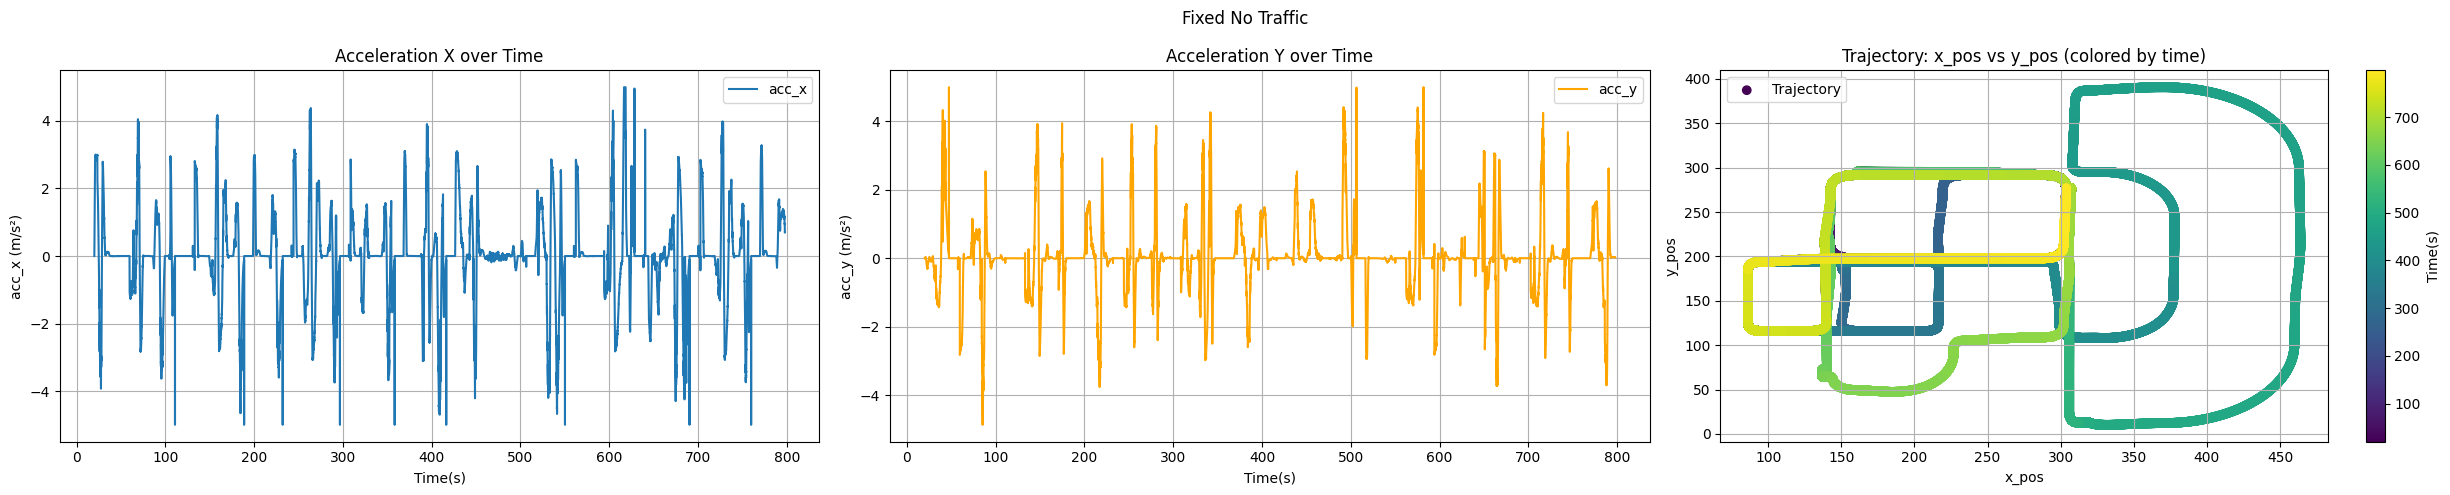

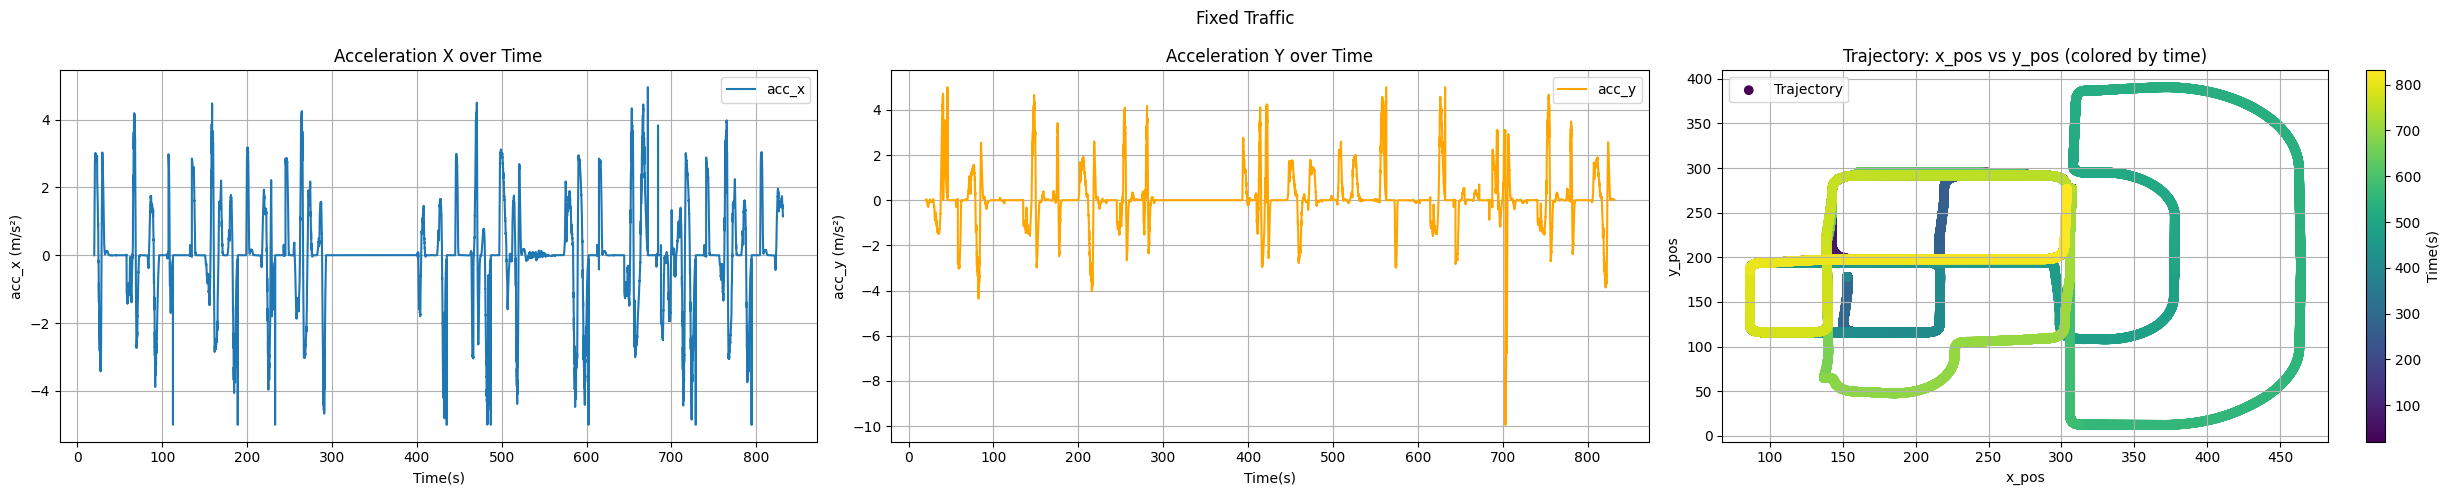

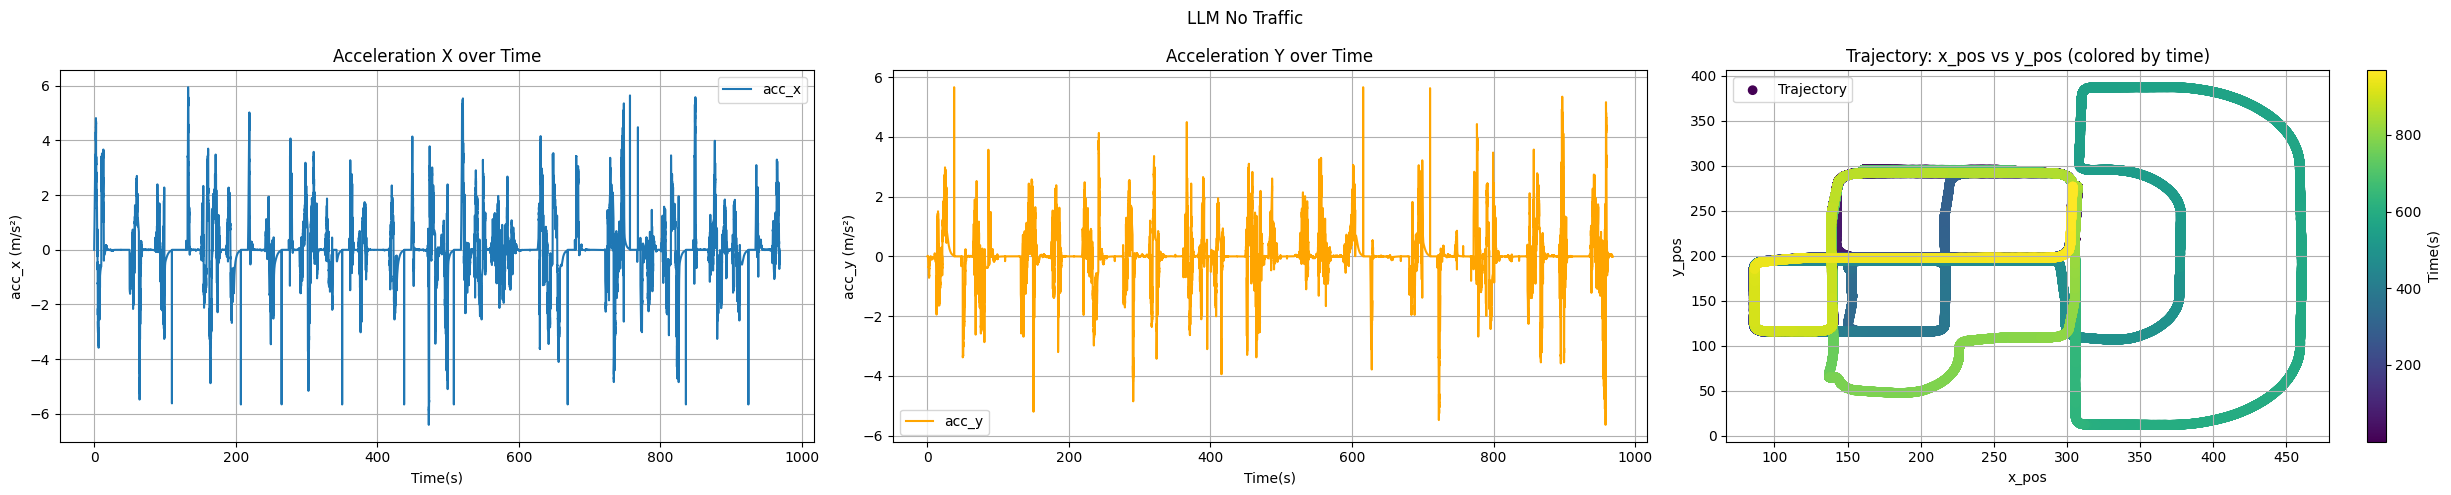

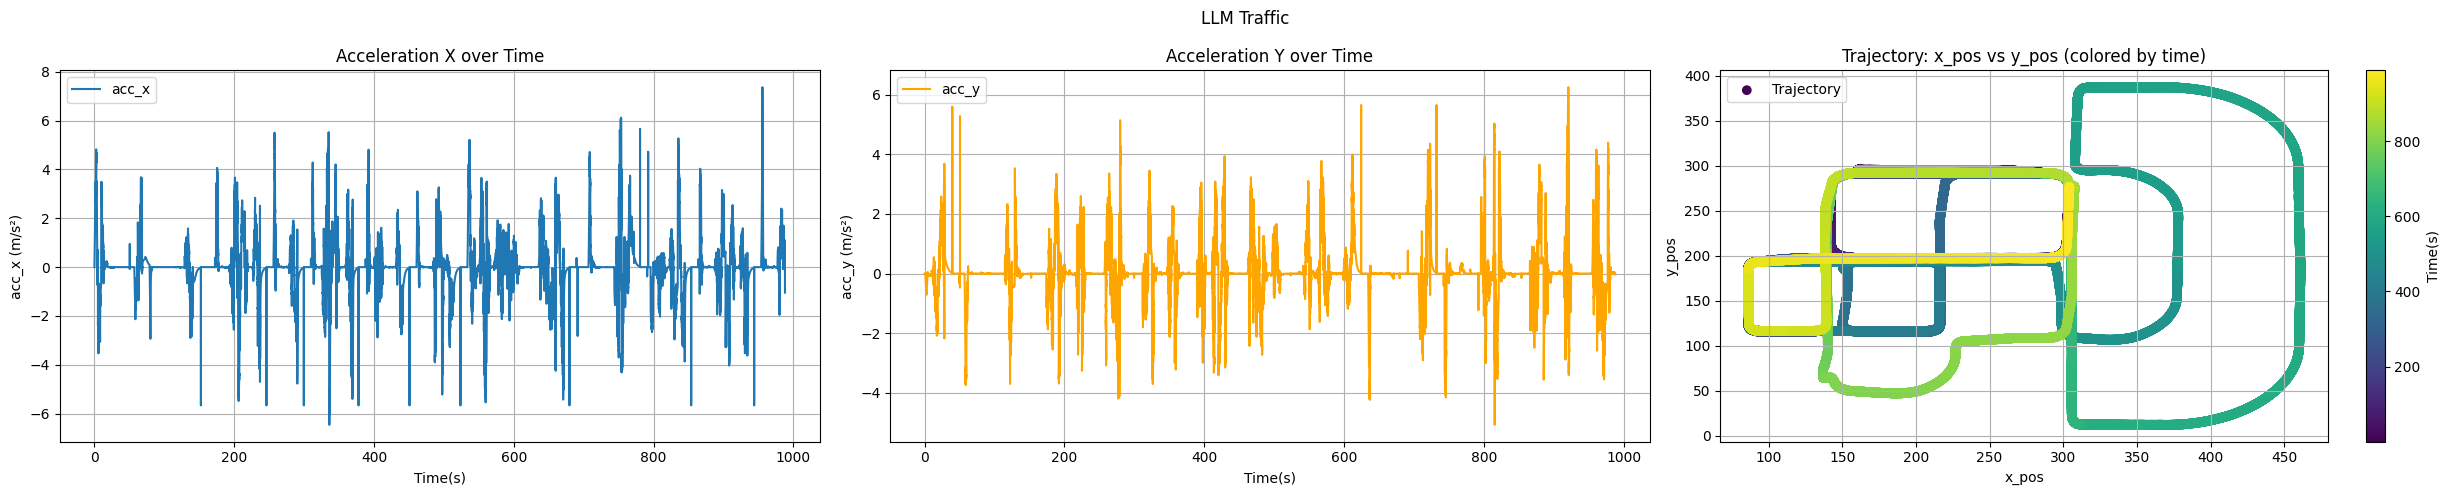

In [86]:
data_path = "../data/synthetic"
df_fixed_notraffic = pd.read_csv(f"{data_path}/sumo/fixed/no_traffic/veh_0_aggressive.csv")
df_fixed_traffic = pd.read_csv(f"{data_path}/sumo/fixed/traffic/veh_0_aggressive.csv")
df_llm_notraffic = pd.read_csv(f"{data_path}/sumo/llm/no_traffic/veh_0_aggressive.csv")
df_llm_traffic = pd.read_csv(f"{data_path}/sumo/llm/traffic/veh_0_aggressive.csv")

plot_df(df_fixed_notraffic, title="Fixed No Traffic")
plot_df(df_fixed_traffic, title="Fixed Traffic")
plot_df(df_llm_notraffic, title="LLM No Traffic")
plot_df(df_llm_traffic, title="LLM Traffic")